# **TravelLens**

In [ ]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Bangkit 2023/Capstone Project/Bali/Bali Landmark 50 Set"

In [ ]:
os.listdir(dataset_path)

['Bedugul',
 'Monumen Bajra Sandi',
 'Patung Nakula Sadewa',
 'Ground Zero',
 'Vihara Dharma Giri',
 'Tanah Lot',
 'Garuda Wisnu Kencana',
 'Patung Dewa Ruci',
 'Patung Satria Gatotkaca']

In [ ]:
# Path ke folder tujuan untuk train set dan validation/test set
train_path = "./dataset/train"
val_test_path = "./dataset/test"

# Rasio pembagian train set dan validation/test set
test_size = 0.25

from sklearn.model_selection import train_test_split
import shutil

# Loop melalui setiap kelas dalam dataset
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Membuat folder tujuan untuk kelas pada train set dan validation/test set
        train_class_dir = os.path.join(train_path, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        val_test_class_dir = os.path.join(val_test_path, class_name)
        os.makedirs(val_test_class_dir, exist_ok=True)
        
        # Mendapatkan list semua file gambar dalam kelas
        image_files = [file for file in os.listdir(class_path) if file.endswith((".png", ".jpg", ".jpeg"))]
        
        # Memecah dataset menjadi train set dan validation/test set
        train_files, val_test_files = train_test_split(image_files, test_size=test_size, random_state=42)
        
        # Memindahkan file gambar ke folder tujuan
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(train_class_dir, file)
            shutil.copyfile(src, dst)
        
        for file in val_test_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(val_test_class_dir, file)
            shutil.copyfile(src, dst)

In [ ]:
# Konfigurasi dataset dan direktori
train_dir = train_path
test_dir = val_test_path
input_shape = (224, 224)
batch_size = 32
num_classes = 9

In [ ]:
# Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3616 images belonging to 9 classes.
Found 1208 images belonging to 9 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 26, 26, 64)     

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/15
113/113 [==============================] - 19s 141ms/step - loss: 1.8425 - accuracy: 0.3128 - val_loss: 1.3964 - val_accuracy: 0.5083
Epoch 2/15
113/113 [==============================] - 14s 122ms/step - loss: 1.1022 - accuracy: 0.6297 - val_loss: 0.7693 - val_accuracy: 0.7508
Epoch 3/15
113/113 [==============================] - 14s 123ms/step - loss: 0.5797 - accuracy: 0.8114 - val_loss: 0.6277 - val_accuracy: 0.7798
Epoch 4/15
113/113 [==============================] - 14s 126ms/step - loss: 0.3477 - accuracy: 0.8789 - val_loss: 0.3755 - val_accuracy: 0.8775
Epoch 5/15
113/113 [==============================] - 14s 125ms/step - loss: 0.2032 - accuracy: 0.9284 - val_loss: 0.4785 - val_accuracy: 0.8601
Epoch 6/15
113/113 [==============================] - 14s 126ms/step - loss: 0.1613 - accuracy: 0.9450 - val_loss: 0.3386 - val_accuracy: 0.8891
Epoch 7/15
113/113 [==============================] - 14s 125ms/step - loss: 0.0809 - accuracy: 0.9737 - val_loss: 0.1976 - val_ac

In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

38/38 - 3s - loss: 0.1240 - accuracy: 0.9619 - 3s/epoch - 86ms/step
Test accuracy: 0.9619205594062805


In [ ]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0,5),
    layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['precision'])

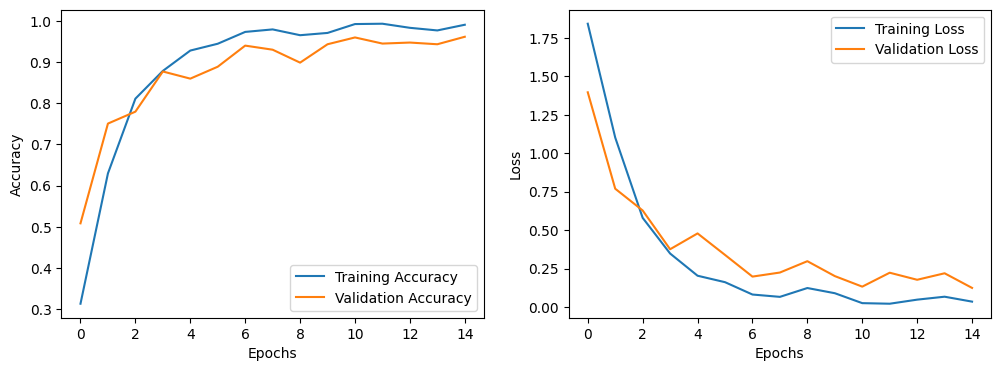

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

for filename in uploaded.keys():
    loc = ('/content/' + filename)
    print(loc)

Saving Image_123.jpg to Image_123.jpg
/content/Image_123.jpg


1/1 [==============================] - 0s 21ms/step
Prediksi: Tanah Lot
Kepercayaan: 0.99579716


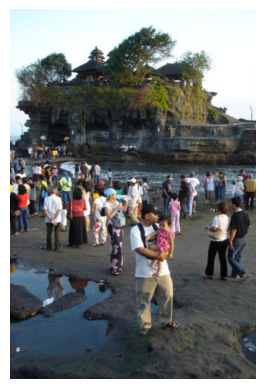

In [ ]:
# # Fungsi untuk memuat gambar dari URL atau direktori file
def load_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# path gambar yang ingin diprediksi
image_path = loc

# Load dan preproses gambar
image = load_image(image_path)
# Atau: image = load_image(image_path)

# Melakukan prediksi
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Label kelas yang sesuai dengan prediksi
class_labels = ['Bedugul','Garuda Wisnu Kencana','Ground Zero','Monumen Bajra Sandi','Patung Dewa Ruci','Patung Nakula Sadewa','Patung Satria Gatotkaca','Tanah Lot', 'Vihara Dharma Giri']
predicted_label = class_labels[predicted_class]

print('Prediksi:', predicted_label)
print('Kepercayaan:', confidence)

img = mpimg.imread(loc)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Meminta pengguna untuk mengunggah file
uploaded = files.upload()

for filename in uploaded.keys():
    loc = ('/content/' + filename)
    print(loc)

Saving Image_51.jpg to Image_51.jpg
/content/Image_51.jpg


1/1 [==============================] - 0s 19ms/step
Prediksi: Vihara Dharma Giri
Kepercayaan: 0.9932955


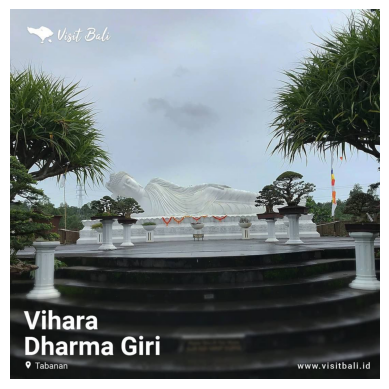

In [ ]:
# # Fungsi untuk memuat gambar dari URL atau direktori file
def load_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# path gambar yang ingin diprediksi
image_path = loc

# Load dan preproses gambar
image = load_image(image_path)
# Atau: image = load_image(image_path)

# Melakukan prediksi
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Label kelas yang sesuai dengan prediksi
class_labels = ['Bedugul','Garuda Wisnu Kencana','Ground Zero','Monumen Bajra Sandi','Patung Dewa Ruci','Patung Nakula Sadewa','Patung Satria Gatotkaca','Tanah Lot', 'Vihara Dharma Giri']
predicted_label = class_labels[predicted_class]

print('Prediksi:', predicted_label)
print('Kepercayaan:', confidence)

img = mpimg.imread(loc)
plt.imshow(img)
plt.axis('off')
plt.show()